In [ ]:
import pandas as pd
df = pd.read_csv('tx_data_clean.csv')
df.County.nunique()

print(df.Total_Costs.isna().sum()/df.Total_Costs.count())

0.3934006328160313


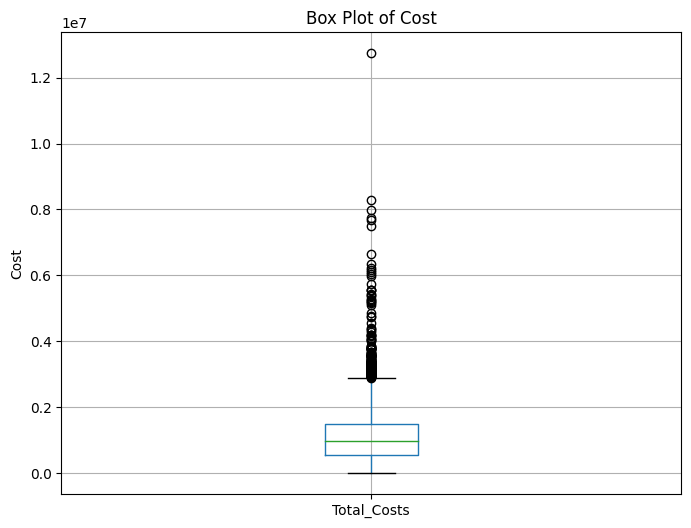

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Trying to see how many outliers are in data
plt.figure(figsize=(8, 6))
df.boxplot(column='Total_Costs')
plt.title('Box Plot of Cost')
plt.ylabel('Cost')
plt.show()

In [ ]:
#Using IQR in order to find outliers

Q1 = df['Total_Costs'].quantile(0.25)
Q3 = df['Total_Costs'].quantile(0.75)
IQR = Q3 - Q1

# Getting the lower and upper bound
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cide inspired from Stack Overflow, helped me to see how much of the data was outliers
outliers_count = ((df['Total_Costs'] < lower_bound) | (df['Total_Costs'] > upper_bound)).sum()

print(outliers_count/df.Total_Costs.count())

0.02862739189392798


In [ ]:
#median_cost = df['Total_Costs'].median()

#df['Total_Costs'].fillna(median_cost, inplace=True)


In [ ]:
#New groupby using cost. Mistake was made, as we didn't seperate by year
df.groupby('County')['Total_Costs'].agg(['mean']).sort_values(by = 'mean', ascending = False)

,mean
County,
ROCKWALL,1.946073e+06
COMAL,1.944353e+06
HIDALGO,1.651846e+06
COLLIN,1.551281e+06
CALHOUN,1.545649e+06
...,...
GARZA,1.716483e+05
CAMP,1.682013e+05
REAL,1.588084e+05


In [ ]:
print(df.Gross_Revenue.isna().sum()/df.Gross_Revenue.count())

#median_revenue = df['Gross_Revenue'].median()

#df['Gross_Revenue'].fillna(median_cost, inplace=True)

0.022217309605394052


In [ ]:
#Dropping null values in Gross_Revenue, then making a new calculation based on gross revenue.
df.dropna(subset=['Gross_Revenue'], inplace=True)


df.groupby('County')['Gross_Revenue'].agg(['mean']).sort_values(by = 'mean', ascending = False)

,mean
County,
ROCKWALL,1.190201e+07
WISE,9.995854e+06
COMAL,8.298733e+06
CORYELL,8.297644e+06
MIDLAND,7.763386e+06
...,...
GARZA,1.183790e+06
MENARD,1.080987e+06
CAMP,1.032965e+06


In [ ]:
print(df.Net_Income.isna().sum()/df.Net_Income.count())

#median_income = df['Net_Income'].median()

#df['Net_Income'].fillna(median_income, inplace=True)

0.00835934016941596


In [ ]:
#Getting the mean for net income for each county
df.groupby('County')['Net_Income'].agg(['mean']).sort_values(by = 'mean', ascending = False)



,mean
County,
KNOX,4.633515e+06
OCHILTREE,8.972285e+05
CHILDRESS,4.821236e+05
NOLAN,4.374752e+05
GONZALES,3.452103e+05
...,...
POTTER,-4.876103e+05
BRAZOS,-4.948203e+05
NUECES,-5.461849e+05


In [ ]:
#Dropping Null values, seeing if this has any affect on the mean.
df.dropna(subset=['Net_Income'], inplace = True)

df.groupby('County')['Net_Income'].agg(['mean']).sort_values(by = 'mean', ascending = False)



,mean
County,
KNOX,4.633515e+06
OCHILTREE,8.972285e+05
CHILDRESS,4.821236e+05
NOLAN,4.374752e+05
GONZALES,3.452103e+05
...,...
POTTER,-4.876103e+05
BRAZOS,-4.948203e+05
NUECES,-5.461849e+05


In [ ]:
print(df.Total_Income.isna().sum()/df.Net_Income.count())

median__total_income = df['Total_Income'].median()

df['Total_Income'].fillna(median__total_income, inplace=True)

0.2833259028087383


In [ ]:

df.groupby('County')['Total_Income'].agg(['mean']).sort_values(by = 'mean', ascending = False)

,mean
County,
KNOX,5.284137e+06
OCHILTREE,9.039156e+05
CHILDRESS,4.851447e+05
NOLAN,4.402985e+05
GONZALES,3.480094e+05
...,...
HOWARD,-4.148777e+05
POTTER,-4.841528e+05
NUECES,-5.369946e+05


In [ ]:
#This was the paramount question in this dataset. This is where we finally realized we needed to seperate years.
df[df['year'].isin([2020, 2021])].groupby('County')['Net_Income'].agg(['mean']).sort_values(by='mean', ascending=False)


,mean
County,
CHAMBERS,824.250000
PLACER,400.500000
MONTGOMERY,342.250000
BASTROP,311.666667
HARRIS,302.051282
...,...
LEON,25.500000
SAN SABA,25.333333
KNOX,24.750000


In [ ]:
# We wanted to see the data from previous years.
df[df['year'].isin([2015, 2016, 2017, 2018, 2019])].groupby('County')['Net_Income'].agg(['mean']).sort_values(by='mean', ascending=False)


,mean
County,
KNOX,7.281223e+06
OCHILTREE,1.196281e+06
CHILDRESS,6.749426e+05
NOLAN,5.965337e+05
CHAMBERS,5.038126e+05
...,...
POTTER,-6.792850e+05
BRAZOS,-7.010776e+05
NUECES,-7.766083e+05


In [ ]:
# Same as before the last question
df[df['year'].isin([2020,2021])].groupby('County')['Net_Income'].agg(['mean']).sort_values(by='mean', ascending=False)


,mean
County,
CHAMBERS,824.250000
PLACER,400.500000
MONTGOMERY,342.250000
BASTROP,311.666667
HARRIS,302.051282
HIDALGO,294.333333
SAN PATRICIO,292.250000
BEXAR,292.106870
COMAL,290.785714


In [ ]:
df['Net_Profit'] = df['Gross_Revenue'] - df['Total_Costs']

pd.set_option('display.max_rows', None)


df[df['year'].isin([2015, 2016, 2017, 2018, 2019])].groupby('County')['Net_Profit'].agg(['mean']).sort_values(by='mean', ascending=False)


,mean
County,
ROCKWALL,1.662098e+07
WISE,1.404327e+07
CORYELL,1.040929e+07
COMAL,9.985010e+06
MIDLAND,9.776157e+06
DALLAS,8.720926e+06
KERR,8.670720e+06
BELL,8.664410e+06
WILLIAMSON,8.525506e+06


KeyError: 'Column not found: Penalties'